<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Trabajo Final Máster</p>
<p style="margin: 0; text-align:right;">Máster universitario en Ciencia de datos (Data science)
  
 </p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Leidy Liliana Torres Bolívar

 </p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Modelos de detección de fraude en seguros de automóviles

<div class="alert alert-block alert-info">
Leidy Liliana Torres Bolívar</strong>
</div>

El siguiente trabajo buscar aplicar técnicas de Machine Learning para evaluar cuales son potencialmente más efectivas a la hora de encontrar anomalías o mayor probabilidad de fraude en un siniestro de automóvil.

Objetivos:

•	Aplicar técnicas supervisadas y no supervisadas de Machine Learning para la detección de fraude de seguros de automóviles.

•	Evaluar las diferentes técnicas de Machine Learning en el fraude de seguros de automóviles.

•	Identificar cuales técnicas de Machine Learning tienen un mejor desempeño a la hora de detectar o predecir fraude de seguros de automóviles.


A continuación se importan las librerías necesarias

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import h2o
from h2o.estimators import H2OGeneralizedLowRankEstimator
from sklearn.ensemble import IsolationForest
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import class_weight
from collections import Counter

# 1. Carga del conjunto de datos

En primer lugar, se carga el conjunto de datos "Vehicle Insurance Claim Fraud Detection", el cual contiene información del vehículo, de la póliza, del accidente y del asegurado junto con su variable respuesta que este caso es FraudFound_P dónde 1 fue fraude y 0 no fue fraude.

El conjunto de datos se puede descargar de kaggle [https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection?resource=download&select=fraud_oracle.csv]

In [22]:
dataset = pd.read_csv('/Users/Leidy/Downloads/1.TFM/Data/fraud_oracle.csv')
dataset

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [23]:
print("El set de datos contiene",len(dataset),"filas y",len(dataset.columns),"atributos")

El set de datos contiene 15420 filas y 33 atributos


## 1.1 Descripción variables del conjunto de datos

| Campo      | Description |
| :----------- | :----------- |
|Month|Mes en el que ocurrió el accidente|
|WeekOfMonth|Semana en la que ocurrió el accidente|
|DayOfWeek|Día de la semana en que ocurrió el accidente|
|Make|Marca del vehículo|
|AccidentArea|Si el accidente fue en un área rural o urbana|
|DayOfWeekClaimed|Día de la semana en la que se hizo la denuncia|
|MonthClaimed|Mes en el que se hizo la denuncia|
|WeekOfMonthClaimed|Número de semana del mes en la que se hizo la denuncia|
|Sex|Género de la persona que realiza la denuncia|
|MaritalStatus|Estado cívil de la persona que hace la denuncia|
|Age|Edad de la persona que hace la denuncia|
|Fault|Si el culpable fue el dueño del seguro u otro involucrado|
|PolicyType|Combinación de tipo de auto y de tipo de póliza. Liability (contra terceros), Collision (Incluye daños al vehículo del propietario), All Perils (contra todo riesgo)|
|VehicleCategory|Clasificación de tipo de auto|
|VehiclePrice|Rango Precio del vehículo|
|FraudFound_P|Si el accidente fue fraudulento o no (variable de respuesta) 1(Si) - 0(No)|
|PolicyNumber|Número único de accidente|
|RepNumber|Numeración entre 1 y 16|
|Deductible|Costo que paga el asegurado por el accidente|
|DriverRating|Calificación del piloto|
|Days_Policy_Accident|Rango adquisición del seguro y suceso del accidente|
|Days_Policy_Claim|Rango entre adquisición del seguro y denuncia del accidente|
|PastNumberOfClaims|Cantidad de denuncias anteriores realizadas por el dueño del vehículo|
|AgeOfVehicle|Edad del vehículo|
|AgeOfPolicyHolder|Edad del dueño del seguro|
|PoliceReportFiled|Si fue denunciado a la policía|
|WitnessPresent|Si hay testigos|
|AgentType|Internos son cuando el fraude es realizado por personas trabajando en la empresa de seguros. Externos son los fraudes en los que el seguro es engañado por personas independientes.|
|NumberOfSuppliments|Daños al vehículo no registrados a la hora de la denuncia|
|AddressChange_Claim|Si el dueño del seguro se mudó después de denunciar un accidente y cuanto tiempo después|
|NumberOfCars|Número de autos involucrados en el accidente|
|Year|Año en el que ocurrió el accidente|
|BasePolicy|Tipo de seguro|

# 2. Preparación y limpieza de los datos

## 2.1 Verificación valores vacíos

Como se evidencia a continuación el set de datos NO tiene "missing values"

In [24]:
dataset.isnull().values.any()

False

## 2.2 Verificación valores duplicados

Se valida que no existan reclamaciones duplicadas por el campo PolicyNumber

In [25]:
dataset[dataset.PolicyNumber.duplicated()]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


## 2.3 Eliminación de variables innecesarias

se elimina del dataset la variable PolicyNumber ya que es un identificador único del accidente y no aportará en la construcción de los modelos

In [26]:
dataset=dataset.drop(["PolicyNumber"], axis = 1)

## 2.3 Identificación y ajustes a Tipos de datos

In [27]:
dataset.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePolicy              object
dtype: o

Como se observa la variable FraudFound_P es de tipo entero. Sin embargo, esta debe ser de tipo String ya que se catalogará como una variable cualitativa

In [28]:
dataset['FraudFound_P'] = dataset['FraudFound_P'].astype(str)

# 3. Exploración de los datos

## 3.1 Variable de estudio o dependiente FraudFound_P

In [29]:
dataset['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

<AxesSubplot:xlabel='FraudFound_P'>

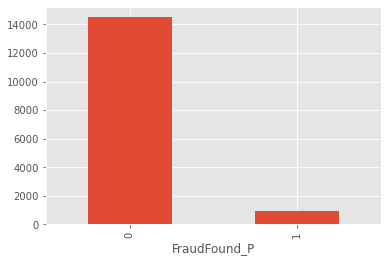

In [30]:
dataset.groupby('FraudFound_P')['FraudFound_P'].count().plot(kind='bar')

El 6% de los accidentes reportados presentan acciones fraudulentas.

## 3.2 Variables Númericas

In [31]:
dataset.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,16.000000,700.000000,4.000000,1996.000000


In [32]:
dataset[(dataset.Age==0)]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
13,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
31,Mar,1,Sunday,Honda,Urban,Tuesday,Mar,2,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
58,May,1,Monday,Honda,Rural,Wednesday,May,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Liability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15243,May,2,Tuesday,Honda,Urban,Monday,May,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15262,Mar,3,Monday,Honda,Urban,Thursday,Mar,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15274,Apr,3,Monday,Honda,Urban,Tuesday,May,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Collision
15379,Jan,2,Tuesday,Honda,Urban,Thursday,Jan,2,Male,Single,...,new,16 to 17,No,No,External,none,1 year,1 vehicle,1996,All Perils


La edad tiene una inconsitencia con valores en 0, por ello se procede a reemplazar por la mediana del set de datos.

In [34]:
dataset["Age"] = dataset["Age"].replace(0,dataset["Age"].median())

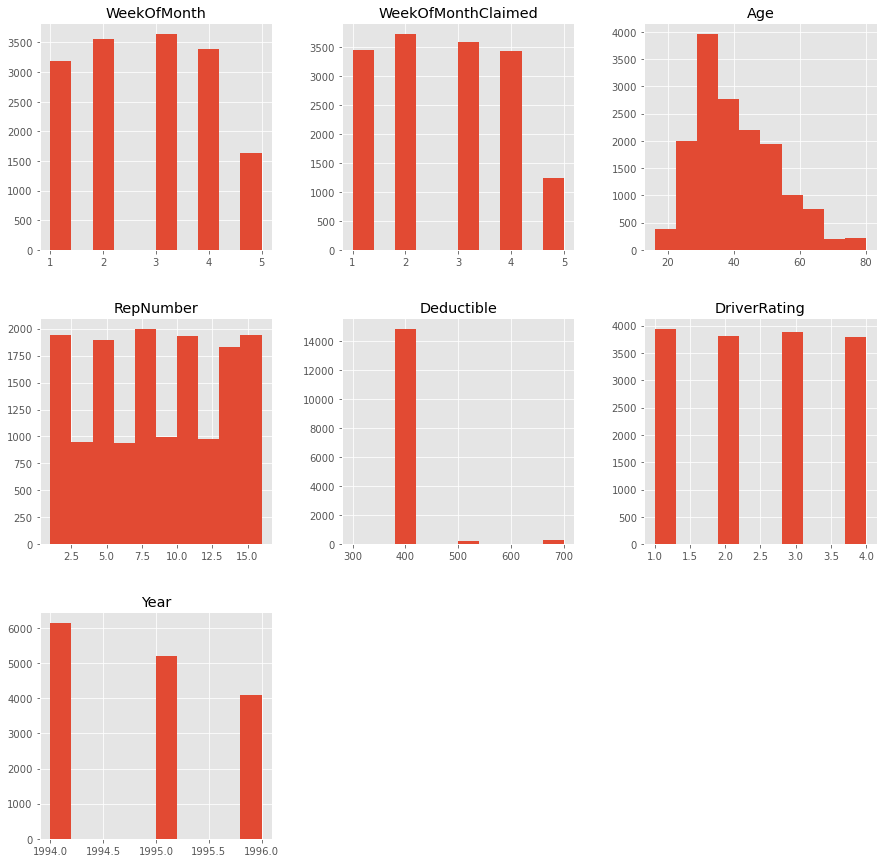

In [35]:
dataset_ind = dataset.drop(["FraudFound_P"], axis = 1)
dataset_ind.hist(figsize = (15, 15))
plt.show()

<div class="alert alert-block alert-info">
Inferencia:</strong>
</div>

El deducible se encuentra en 3 categorías, principalmente en 400.

Los meses y semanas del mes de ocurrencia de los accidentes se distribuyen de manera equitativa.

La edad tiene una aparente distribución normal. Sin embargo, se ven algunos valores inconsistentes o outliers.

Los años de los automóviles se encuentran en tres grupos, siendo 1994 el año con más vehículos.

In [25]:
dataset[(dataset.Age==0)]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


### Correlación entre variables

In [26]:
dataset.corr()

,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275400,-0.011348,0.005283,-0.003993,-0.016817,-0.003906
WeekOfMonthClaimed,0.275400,1.000000,0.001084,0.008908,0.005457,-0.000048,0.012175
Age,-0.011348,0.001084,1.000000,-0.005430,0.065051,0.000745,0.017254
RepNumber,0.005283,0.008908,-0.005430,1.000000,0.000509,0.011031,0.009338
Deductible,-0.003993,0.005457,0.065051,0.000509,1.000000,0.003886,-0.001170
DriverRating,-0.016817,-0.000048,0.000745,0.011031,0.003886,1.000000,-0.013890
Year,-0.003906,0.012175,0.017254,0.009338,-0.001170,-0.013890,1.000000


<AxesSubplot:>

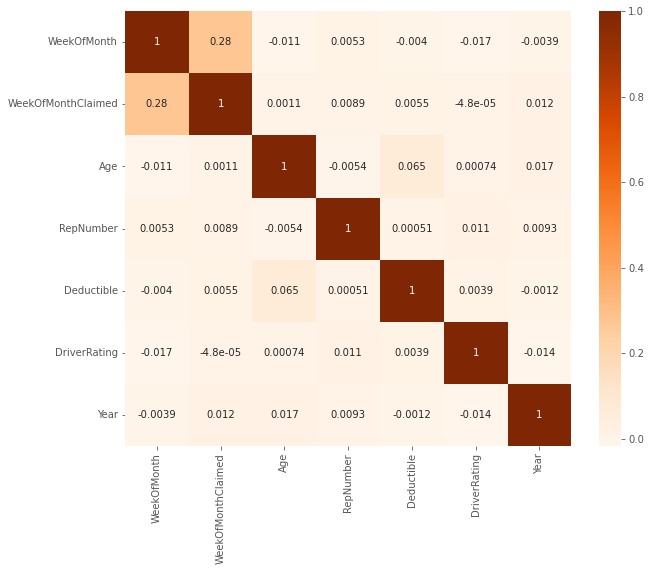

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True, cmap="Oranges")

<div class="alert alert-block alert-info">
Inferencia:</strong>
</div>

Podemos evidenciar que no existe correlaciones fuertes entre las variables

## 3.3 Variables Categóricas

In [28]:
variables = ['Month', 'DayOfWeek', 'Make', 'AccidentArea']

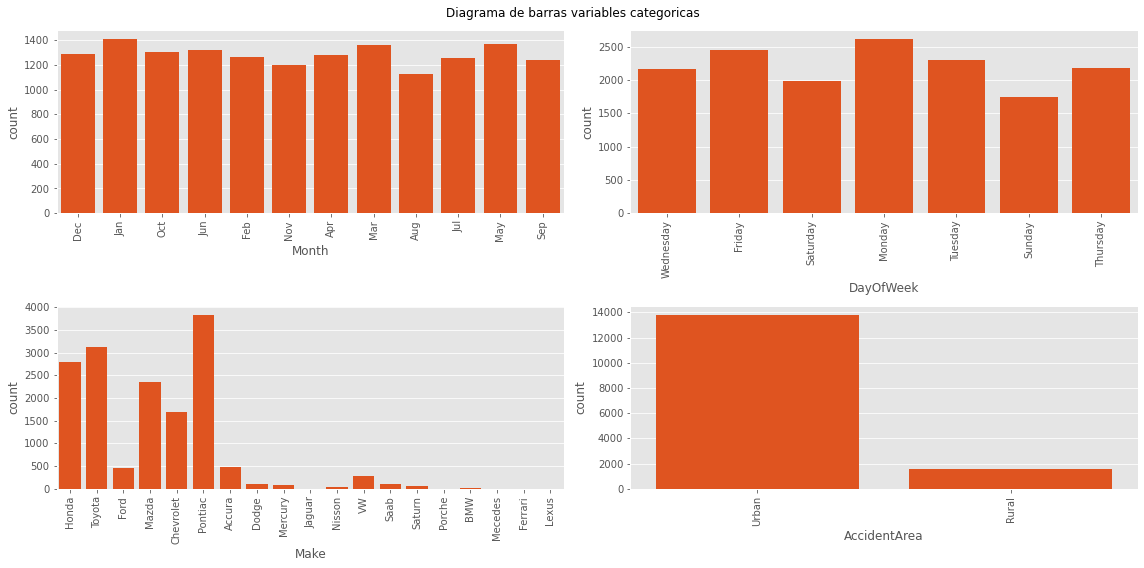

In [29]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(variables):
    ax = plt.subplot(2, 2, i+1)
    sns.countplot(data=dataset, x=col, ax=ax, color='orangered')
    plt.xticks(rotation='vertical')
plt.suptitle('Diagrama de barras variables categoricas')
plt.tight_layout()

In [30]:
variables = ['DayOfWeekClaimed','MonthClaimed', 'Sex', 'MaritalStatus']

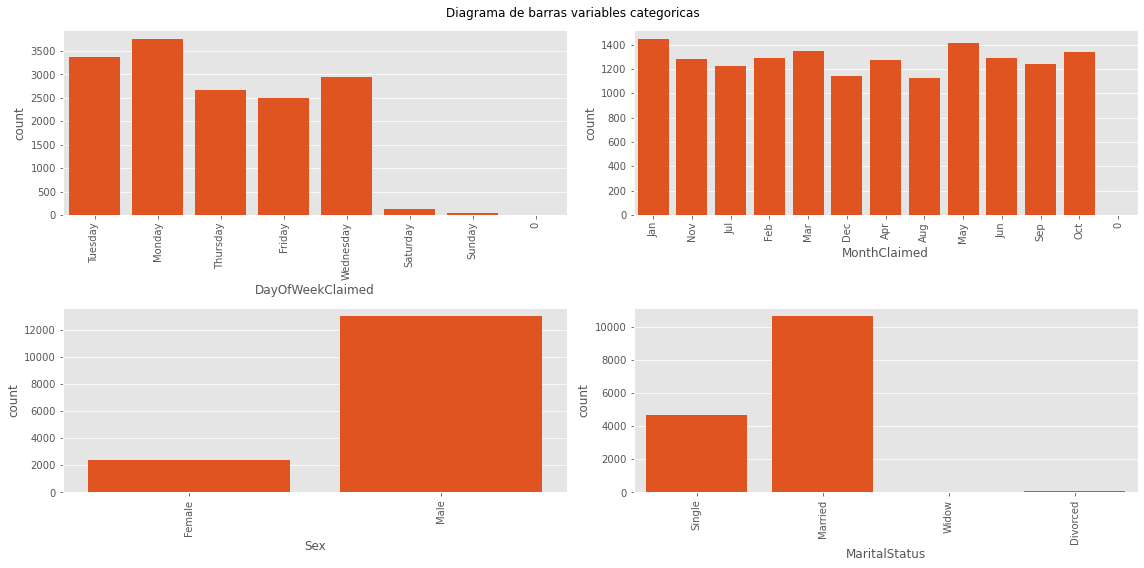

In [31]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(variables):
    ax = plt.subplot(2, 2, i+1)
    sns.countplot(data=dataset, x=col, ax=ax, color='orangered')
    plt.xticks(rotation='vertical')
plt.suptitle('Diagrama de barras variables categoricas')
plt.tight_layout()

Se observa un registro con un valor que no corresponde a los días de la semana, se elimina ya que es sólo un registro

In [32]:
dataset=dataset[dataset["DayOfWeekClaimed"] != '0']

In [33]:
variables = ['Fault','PolicyType','VehicleCategory','VehiclePrice']

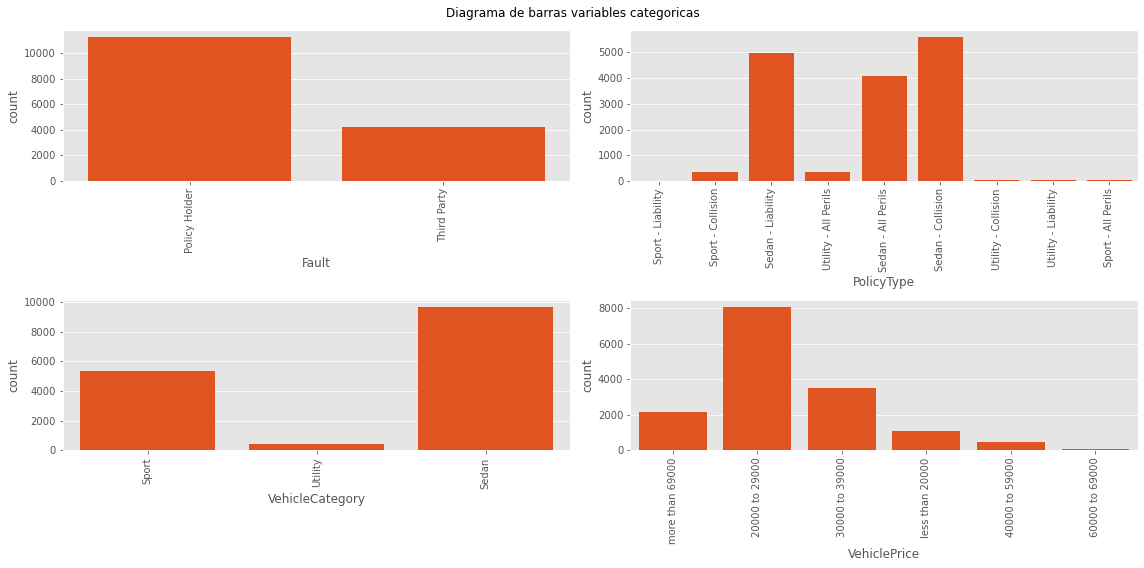

In [34]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(variables):
    ax = plt.subplot(2, 2, i+1)
    sns.countplot(data=dataset, x=col, ax=ax, color='orangered')
    plt.xticks(rotation='vertical')
plt.suptitle('Diagrama de barras variables categoricas')
plt.tight_layout()

In [35]:
variables = ['Days_Policy_Accident','Days_Policy_Claim','PastNumberOfClaims','AgeOfVehicle']

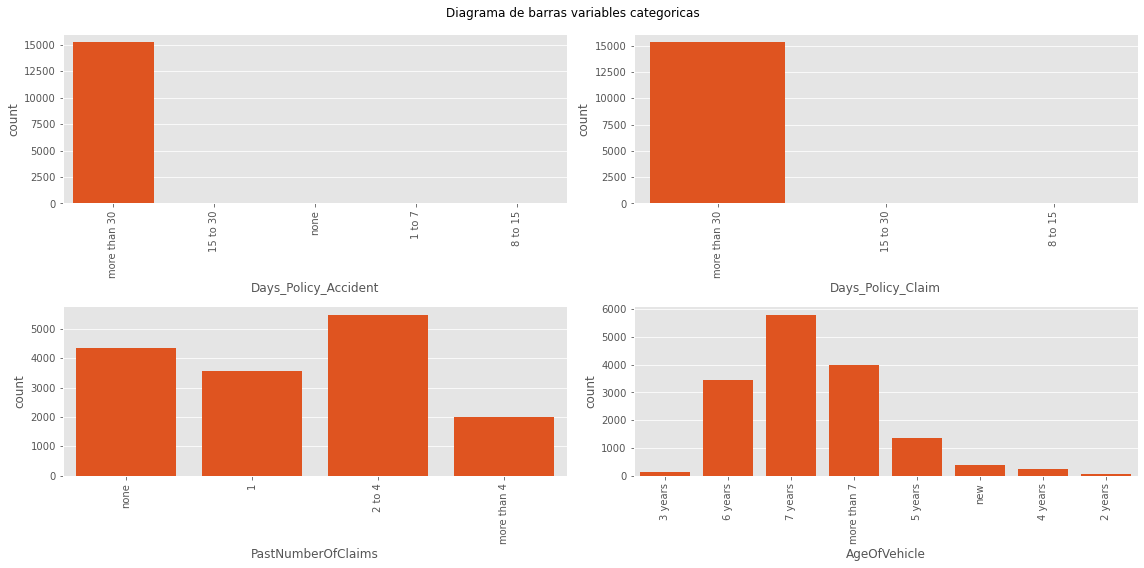

In [36]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(variables):
    ax = plt.subplot(2, 2, i+1)
    sns.countplot(data=dataset, x=col, ax=ax, color='orangered')
    plt.xticks(rotation='vertical')
plt.suptitle('Diagrama de barras variables categoricas')
plt.tight_layout()

In [37]:
variables = ['AgeOfPolicyHolder','PoliceReportFiled','WitnessPresent', 'AgentType']

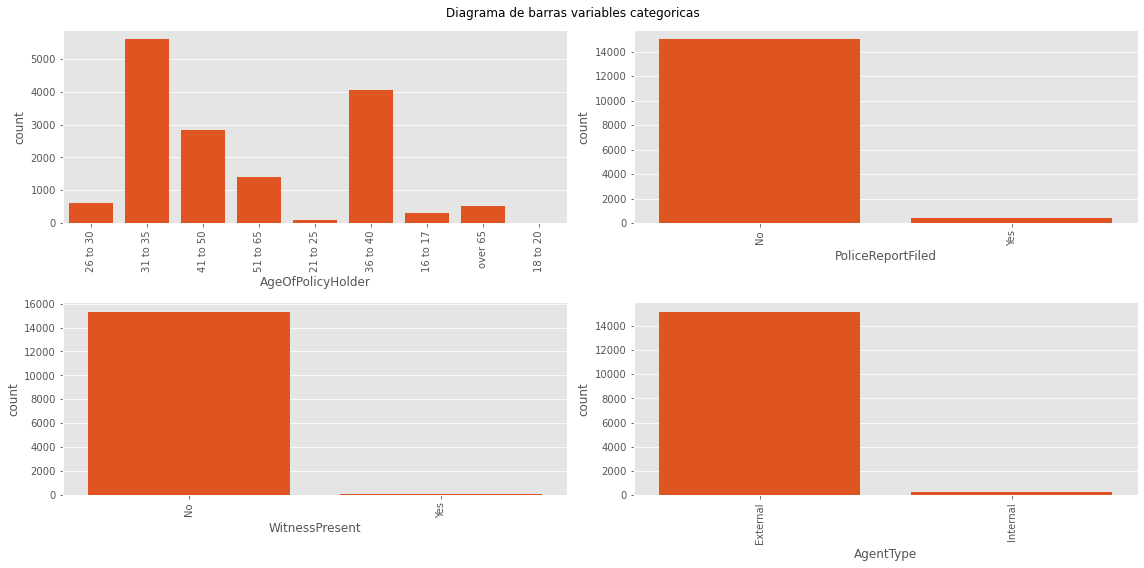

In [38]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(variables):
    ax = plt.subplot(2, 2, i+1)
    sns.countplot(data=dataset, x=col, ax=ax, color='orangered')
    plt.xticks(rotation='vertical')
plt.suptitle('Diagrama de barras variables categoricas')
plt.tight_layout()

In [39]:
variables = ['NumberOfSuppliments','AddressChange_Claim','NumberOfCars','BasePolicy']

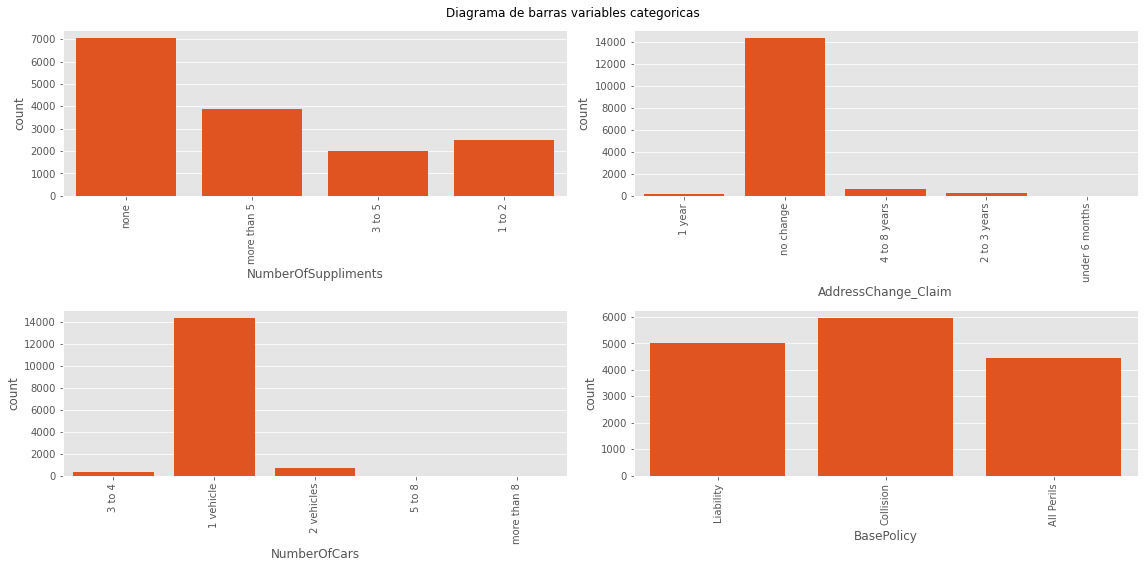

In [40]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(variables):
    ax = plt.subplot(2, 2, i+1)
    sns.countplot(data=dataset, x=col, ax=ax, color='orangered')
    plt.xticks(rotation='vertical')
plt.suptitle('Diagrama de barras variables categoricas')
plt.tight_layout()

<div class="alert alert-block alert-info">
Inferencia:</strong>
</div>

La mayoría de los accidentes reportados pertenecen al género masculino.

Los días de la semana en que menos se hace la denuncia de accidentes son los sábado y domingos.

Las marcas de vehículos que reportan más accidentes son Pontiac, Honda y Toyota y con 7 años de antigüedad.

Por su parte el área urbana representa la mayoria de accidentes.

## 3.4 Análisis exploratorio de los datos

Frecuencia de fraude por cada variable.

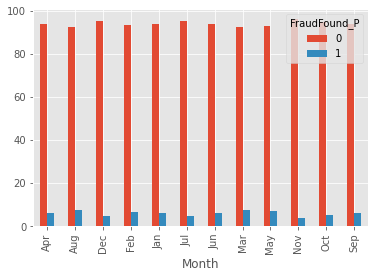

In [41]:
plot = pd.crosstab(index=dataset["Month"],
            columns=dataset['FraudFound_P']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

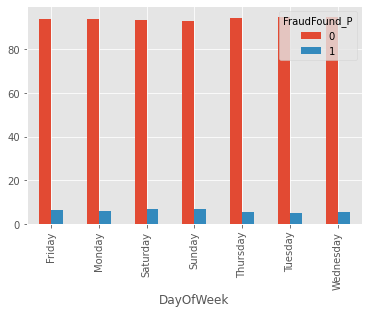

In [42]:
plot = pd.crosstab(index=dataset["DayOfWeek"],
            columns=dataset['FraudFound_P']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

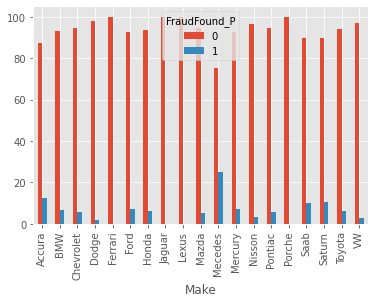

In [43]:
plot = pd.crosstab(index=dataset["Make"],
            columns=dataset['FraudFound_P']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

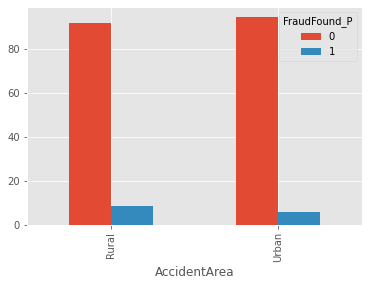

In [44]:
plot = pd.crosstab(index=dataset["AccidentArea"],
            columns=dataset['FraudFound_P']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

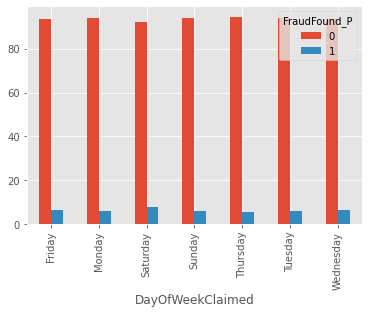

In [45]:
plot = pd.crosstab(index=dataset["DayOfWeekClaimed"],
            columns=dataset['FraudFound_P']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

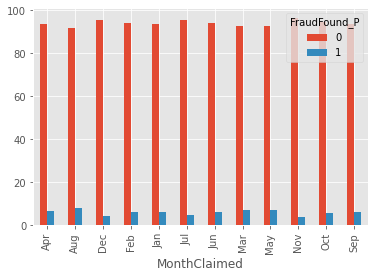

In [46]:
plot = pd.crosstab(index=dataset["MonthClaimed"],
            columns=dataset['FraudFound_P']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

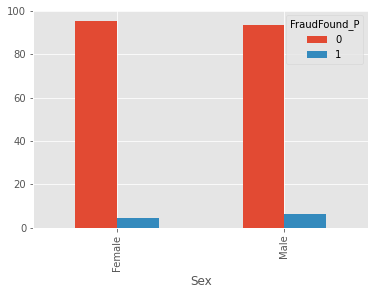

In [47]:
plot = pd.crosstab(index=dataset["Sex"],
            columns=dataset['FraudFound_P']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

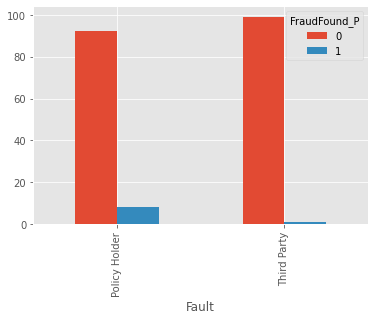

In [48]:
plot = pd.crosstab(index=dataset["Fault"],
            columns=dataset["FraudFound_P"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

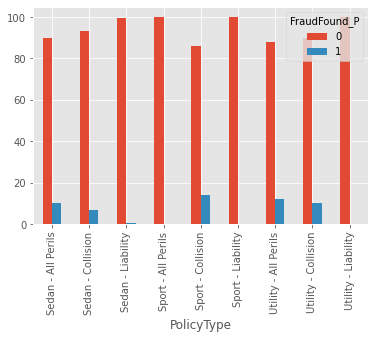

In [49]:
plot = pd.crosstab(index=dataset["PolicyType"],
            columns=dataset["FraudFound_P"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

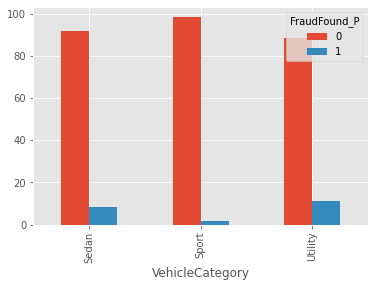

In [50]:
plot = pd.crosstab(index=dataset["VehicleCategory"],
            columns=dataset["FraudFound_P"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

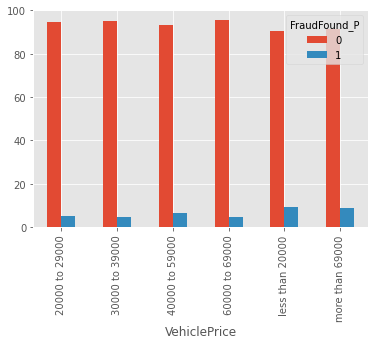

In [51]:
plot = pd.crosstab(index=dataset["VehiclePrice"],
            columns=dataset["FraudFound_P"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

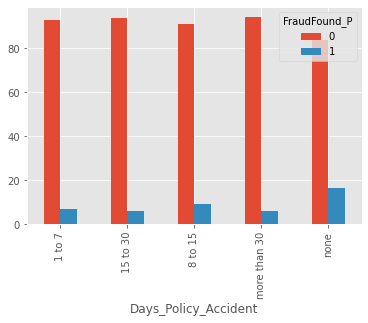

In [52]:
plot = pd.crosstab(index=dataset["Days_Policy_Accident"],
            columns=dataset["FraudFound_P"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

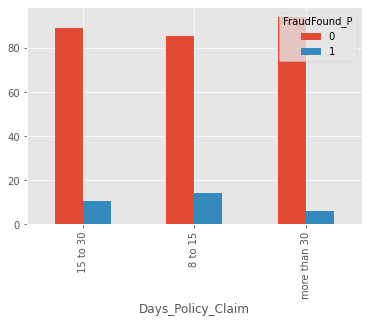

In [53]:
plot = pd.crosstab(index=dataset["Days_Policy_Claim"],
            columns=dataset["FraudFound_P"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

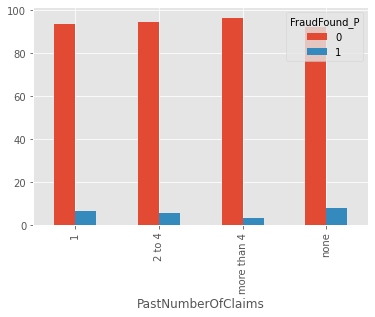

In [54]:
plot = pd.crosstab(index=dataset["PastNumberOfClaims"],
            columns=dataset["FraudFound_P"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

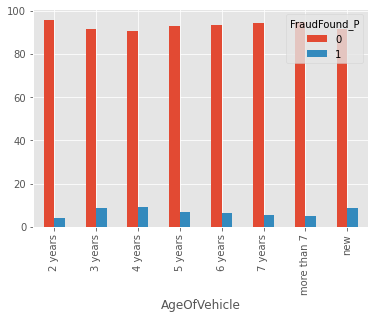

In [55]:
plot = pd.crosstab(index=dataset["AgeOfVehicle"],
            columns=dataset["FraudFound_P"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

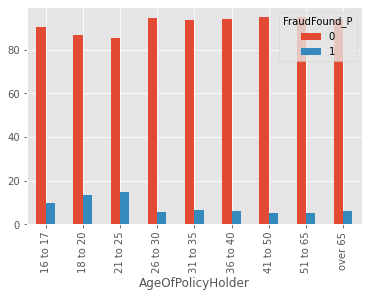

In [56]:
plot = pd.crosstab(index=dataset["AgeOfPolicyHolder"],
            columns=dataset["FraudFound_P"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

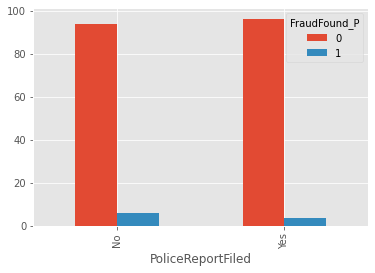

In [57]:
plot = pd.crosstab(index=dataset["PoliceReportFiled"],
            columns=dataset["FraudFound_P"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

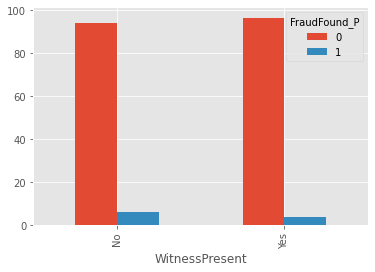

In [58]:
plot = pd.crosstab(index=dataset["WitnessPresent"],
            columns=dataset["FraudFound_P"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

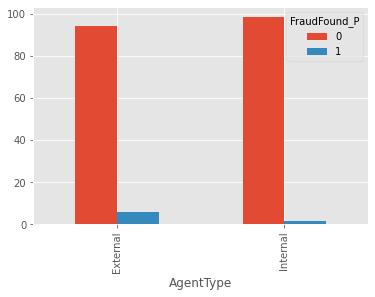

In [59]:
plot = pd.crosstab(index=dataset["AgentType"],
            columns=dataset["FraudFound_P"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

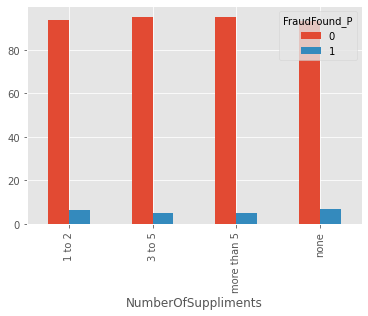

In [60]:
plot = pd.crosstab(index=dataset["NumberOfSuppliments"],
            columns=dataset["FraudFound_P"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

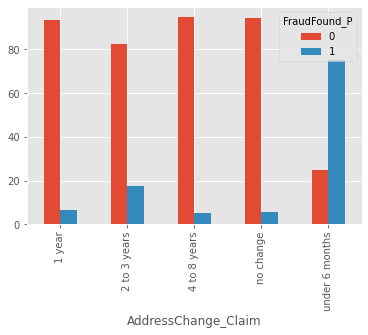

In [61]:
plot = pd.crosstab(index=dataset["AddressChange_Claim"],
            columns=dataset["FraudFound_P"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

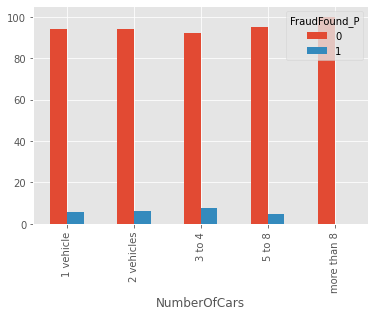

In [62]:
plot = pd.crosstab(index=dataset["NumberOfCars"],
            columns=dataset["FraudFound_P"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

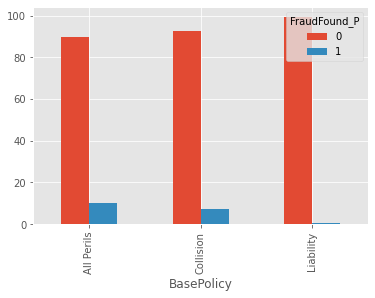

In [63]:
plot = pd.crosstab(index=dataset["BasePolicy"],
            columns=dataset["FraudFound_P"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

<div class="alert alert-block alert-info">
Inferencia:</strong>
</div>

Las variables más relacionadas con el fraude son: Make, AccidentArea , Fault, PolicyType, VehicleCategory, Days_Policy_Accident, Days_Policy_Claim, AgeOfPolicyHolder, AgentType, AddressChange_Claim, BasePolicy

In [64]:
variables_rel_fraud = ['Make', 'AccidentArea', 'Fault', 'PolicyType', 'VehicleCategory', 'Days_Policy_Accident', 'Days_Policy_Claim', 'AgeOfPolicyHolder', 'AgentType', 'AddressChange_Claim', 'BasePolicy']

# 4. Implementación de Modelos No Supervisados

Este tipo de modelos se usan cuando los datos no se encuentran etiquetados o NO se cuenta con la variable objetivo. Sin embargo, como parte del estudio que se realizará en el TFM se evaluaran algunos modelos y se validaran los resultados con los valores reales.

## 4.1 Generalized Low Rank Model (GLRM)

Los modelos generalized low rank models (GLRMs) son algoritmos para la reducción de la dimensionalidad es decir una generalización del PCA (Análisis de componentes principales), una técnica para describir un conjunto de datos en términos de nuevas variables denominados componentes. Los GLRMs utilizan funciones de coste más robustas que el error cuadrático siendo este potencialmente más adecuado que el PCA para ser utilizado en la detección de anomalías.

En Python se encuentran implementados este tipo de modelos en la librería H2O la cual es capaz de combinar los principales algoritmos de machine learning en entornos de Big Data gracias a su forma de comprimir y almacenar los datos.

Primero se divide el set de datos datos_x (variables independientes) y datos_y (variable dependiente o variable objetivo)

In [65]:
datos_x=dataset.drop(["FraudFound_P"], axis = 1)
datos_y=dataset["FraudFound_P"]

Se inicia el cluster para la transferencia de datos

In [66]:
h2o.init()
h2o.remove_all()
h2o.no_progress()
datos_X_h2o = h2o.H2OFrame(datos_x)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 19.0.1+10-21, mixed mode, sharing)
  Starting server from C:\Users\Leidy\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Leidy\AppData\Local\Temp\tmpzl9mtv39
  JVM stdout: C:\Users\Leidy\AppData\Local\Temp\tmpzl9mtv39\h2o_Leidy_started_from_python.out
  JVM stderr: C:\Users\Leidy\AppData\Local\Temp\tmpzl9mtv39\h2o_Leidy_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Bogota
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,"28 days, 6 hours and 3 minutes"
H2O_cluster_name:,H2O_from_python_Leidy_i02i2b
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.973 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Entrenamiento modelo GLRM con el máximo de componenetes posibles

In [67]:
modelo_glrm = H2OGeneralizedLowRankEstimator(
                k         = min(datos_X_h2o.shape),
                loss      = "absolute",
                transform = 'standardize')

modelo_glrm.train(training_frame=datos_X_h2o)

Model Details
=============
H2OGeneralizedLowRankEstimator : Generalized Low Rank Modeling
Model Key: GLRM_model_python_1671670683061_1


Model Summary: 
    number_of_iterations    final_step_size    final_objective_value
--  ----------------------  -----------------  -----------------------
    152                     9.16911e-05        139681

ModelMetricsGLRM: glrm
** Reported on train data. **

MSE: NaN
RMSE: NaN
Sum of Squared Error (Numeric): 17397.79155078791
Misclassification Error (Categorical): 29672.0

Scoring History: 
     timestamp            duration          iterations    step_size               objective
---  -------------------  ----------------  ------------  ----------------------  ------------------
     2022-12-21 19:58:19  7.734 sec         0.0           0.6666666666666666      2151858.9827497704
     2022-12-21 19:58:21  9.405 sec         1.0           0.4444444444444444      2151858.9827497704
     2022-12-21 19:58:22  10.876 sec        2.0           0.2222222222222222      2151858.9827497704
     2022-12-21 19:58:25  13.486 sec        3.0           0.23333333333333334     1326340.4276450027
     2022-12-21 19:58:26  14.888 sec        4.0           0.15555555555555556     1326340.4276450027
     2022-12-21 19:58:28  16.348 sec        5.0           0.1037037037037037      1326340.4276450027
     2022-12-21 19:58:29  17.778 sec        6.0           0.0691358024691358      1326340.4276450027
     2022-12-21 19:58:30  19.203 sec        7.0           0.0345679012345679      1326340.4276450027
     2022-12-21 19:58:32  20.609 sec        8.0           0.011522633744855966    1326340.4276450027
     2022-12-21 19:58:33  22.050 sec        9.0           0.012098765432098764    731442.0213608663
---  ---                  ---               ---           ---                     ---
     2022-12-21 20:02:02  3 min 50.866 sec  142.0         0.0001466170368472238   139735.5934160763
     2022-12-21 20:02:04  3 min 52.391 sec  143.0         0.00015394788868958498  139731.60044447915
     2022-12-21 20:02:05  3 min 53.953 sec  144.0         0.00016164528312406423  139728.99681515206
     2022-12-21 20:02:07  3 min 55.465 sec  145.0         0.0001077635220827095   139728.99681515206
     2022-12-21 20:02:08  3 min 57.059 sec  146.0         0.00011315169818684497  139694.65494354223
     2022-12-21 20:02:10  3 min 58.614 sec  147.0         0.00011880928309618722  139686.54890829665
     2022-12-21 20:02:11  4 min  0.174 sec  148.0         0.00012474974725099658  139684.19711821422
     2022-12-21 20:02:13  4 min  1.693 sec  149.0         0.00013098723461354642  139682.06016237306
     2022-12-21 20:02:15  4 min  3.288 sec  150.0         0.00013753659634422374  139681.43108108695
     2022-12-21 20:02:16  4 min  4.871 sec  151.0         9.169106422948249e-05   139681.43108108695
[152 rows x 6 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

Como tenemos un modelo de PCA, se evalúa su capacidad para reducir la dimensionalidad de los datos explorando la varianza explicada y acumulada de cada componente.

Text(0.5, 0, 'Componente')

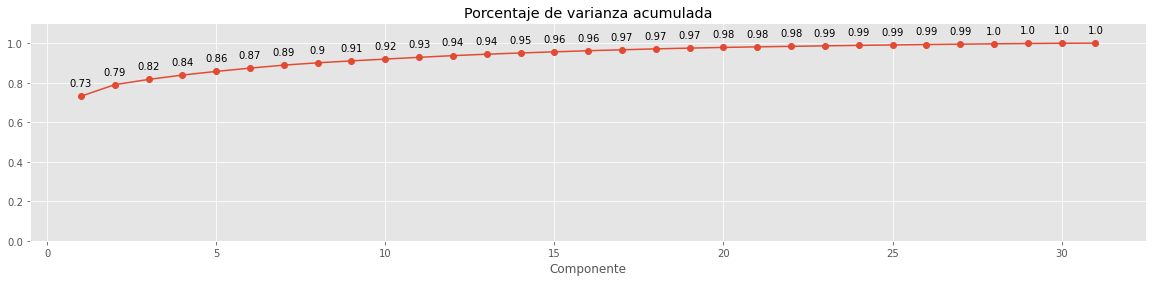

In [69]:
varianza_acum = modelo_glrm.varimp(use_pandas=True).iloc[2, 1:]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
ax.plot(
    np.arange(len(varianza_acum)) + 1,
    varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(varianza_acum)) + 1, varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza acumulada')
ax.set_xlabel('Componente')

<div class="alert alert-block alert-info">
Inferencia:</strong>
</div>

Se puede observar que con las primeras 15 componentes se puede explicar aproximadamente el 93% de la varianza de los datos.

Ahora se realizará el entrenamiento modelo GLRM con las 15 de componenetes

In [70]:
modelo_glrm = H2OGeneralizedLowRankEstimator(
                k         = 15,
                loss      = "absolute",
                transform = 'standardize'
            )
modelo_glrm.train(training_frame=datos_X_h2o)

Model Details
=============
H2OGeneralizedLowRankEstimator : Generalized Low Rank Modeling
Model Key: GLRM_model_python_1671670683061_3


Model Summary: 
    number_of_iterations    final_step_size    final_objective_value
--  ----------------------  -----------------  -----------------------
    1000                    0.000292694        327069

ModelMetricsGLRM: glrm
** Reported on train data. **

MSE: NaN
RMSE: NaN
Sum of Squared Error (Numeric): 42488.00186911045
Misclassification Error (Categorical): 83543.0

Scoring History: 
     timestamp            duration           iterations    step_size               objective
---  -------------------  -----------------  ------------  ----------------------  ------------------
     2022-12-22 17:31:49  3.126 sec          0.0           0.6666666666666666      2147390.556805826
     2022-12-22 17:31:49  3.853 sec          1.0           0.4444444444444444      2147390.556805826
     2022-12-22 17:31:50  4.517 sec          2.0           0.4666666666666667      2015614.473918838
     2022-12-22 17:31:51  5.249 sec          3.0           0.3111111111111111      2015614.473918838
     2022-12-22 17:31:51  5.959 sec          4.0           0.2074074074074074      2015614.473918838
     2022-12-22 17:31:52  6.692 sec          5.0           0.1382716049382716      2015614.473918838
     2022-12-22 17:31:53  7.399 sec          6.0           0.0691358024691358      2015614.473918838
     2022-12-22 17:31:54  8.168 sec          7.0           0.023045267489711932    2015614.473918838
     2022-12-22 17:31:54  8.932 sec          8.0           0.005761316872427983    2015614.473918838
     2022-12-22 17:31:55  9.657 sec          9.0           0.006049382716049382    1382299.7194642704
---  ---                  ---                ---           ---                     ---
     2022-12-22 17:45:07  13 min 21.620 sec  990.0         0.00018867327176149627  327135.8454113567
     2022-12-22 17:45:08  13 min 22.446 sec  991.0         0.0001981069353495711   327123.7050545162
     2022-12-22 17:45:09  13 min 23.217 sec  992.0         0.00020801228211704968  327122.64064490976
     2022-12-22 17:45:10  13 min 24.039 sec  993.0         0.00021841289622290217  327109.96010155836
     2022-12-22 17:45:10  13 min 24.866 sec  994.0         0.00022933354103404728  327108.8072251777
     2022-12-22 17:45:11  13 min 25.677 sec  995.0         0.00024080021808574965  327096.79234548175
     2022-12-22 17:45:12  13 min 26.495 sec  996.0         0.00025284022899003716  327093.94748629467
     2022-12-22 17:45:13  13 min 27.271 sec  997.0         0.00026548224043953904  327081.76067343785
     2022-12-22 17:45:14  13 min 28.097 sec  998.0         0.000278756352461516    327081.24278616504
     2022-12-22 17:45:14  13 min 28.901 sec  999.0         0.0002926941700845918   327069.0702870018
[1000 rows x 6 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

Con el método reconstruct del modelo se puede obtener directamente la reconstrucción para cada observación.

In [75]:
reco = modelo_glrm.reconstruct(test_data=datos_X_h2o, reverse_transform=True)

In [76]:
error_reco = reco - datos_X_h2o
error_reco = error_reco.as_data_frame()
error_reco = error_reco**2
error_reco = error_reco.mean(axis=1)

Detección de anomalías (Matriz de confusión)

In [77]:
df_matriz_conf = pd.DataFrame({
                    'error_reconstruccion' : error_reco,
                    'anomalia'             : datos_y
                })

df_matriz_conf = df_matriz_conf \
                .sort_values('error_reconstruccion', ascending=False) \
                .reset_index(drop=True)

df_matriz_conf['clasificacion'] = np.where(df_matriz_conf.index <= 923, 1, 0)

pd.crosstab(
    df_matriz_conf.anomalia,
    df_matriz_conf.clasificacion
)

clasificacion,0,1
anomalia,,
0,13641,855
1,854,69


<div class="alert alert-block alert-info">
Inferencia:</strong>
</div>

La detección de anomalías por este método arroja que de las 923 observaciones identificadas con anomalías (con fraude), sólo el 8,4% (78/923) lo son y el porcentaje de falsos positivos es del 91% (demasiado elevado), es decir que el modelo no es capaz de hacer una buena detección de anomalías.

## 4.2 Isolation Forest

Isolation Forest es un algoritmo o modelo no supervisado para la detección de anomalías de datos.

Identifica las anomalías mediante el aislamiento (qué tan lejos está un punto de datos del resto de los datos). En lugar de perfilar todas las instancias normales antes de que se identifiquen las anomalías, Isolation Forest detecta anomalías mediante árboles binarios.

Isolation Forest divide el espacio de datos utilizando líneas que son ortogonales al origen y asigna puntajes de anomalía más altos a los puntos de datos que necesitan menos divisiones para aislarse.

En python mediante la libreria scikit-learn se tiene el algoritmo IsolationForest.

Conversión de variables de string a Int

In [78]:
for campo, dato in dataset.items():
    if pd.api.types.is_string_dtype(dato):
        dataset[campo] = dato.astype("category").cat.as_ordered()
               
for campo, dato in dataset.items():
    if not pd.api.types.is_numeric_dtype(dato):
        dataset[campo] = pd.Categorical(dato).codes

In [79]:
datos_x=dataset.drop(["FraudFound_P"], axis = 1)
datos_y=dataset["FraudFound_P"]

Construcción y entrenamiento del modelo IsolationForest

In [80]:
modelo_if = IsolationForest(
                n_estimators  = 1000,
                max_samples   ='auto',
                contamination = 0.01,
                n_jobs        = -1,
                random_state  = 123,
            )

modelo_if.fit(X=datos_x)

IsolationForest(contamination=0.01, n_estimators=1000, n_jobs=-1,
                random_state=123)

Predicción de la clasificación

In [81]:
clasificacion = modelo_if.predict(X=datos_x)

Predicción valor anomalía

In [82]:
score_anomalia = modelo_if.score_samples(X=datos_x)
score_anomalia

array([-0.62154814, -0.53383735, -0.47827364, ..., -0.52607873,
       -0.52128312, -0.48817597])

In [83]:
cuantil_01 = np.quantile(score_anomalia, q=0.01)
cuantil_01

-0.5672873037448202

In [84]:
modelo_if.offset_

-0.5672873037448202

Distribución de los valores de anomalía

C:\Users\Leidy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Leidy\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


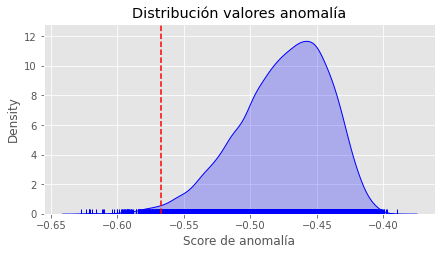

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.distplot(
    score_anomalia,
    hist    = False,
    rug     = True,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax
)

ax.axvline(cuantil_01, c='red', linestyle='--', label='cuantil 0.01')
ax.set_title('Distribución valores anomalía')
ax.set_xlabel('Score de anomalía');

Distribución de los valores de anomalía

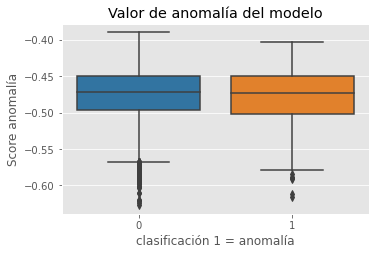

In [86]:
df_matriz_conf = pd.DataFrame({
                    'score'    : score_anomalia,
                    'anomalia' : datos_y
                })

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 3.5))
sns.boxplot(
    x     = 'anomalia',
    y     = 'score',
    data  = df_matriz_conf,
    color = "white",
    palette = 'tab10',
    ax    = ax
)

ax.set_title('Valor de anomalía del modelo')
ax.set_ylabel('Score anomalía')
ax.set_xlabel('clasificación 1 = anomalía');

<div class="alert alert-block alert-info">
Inferencia:</strong>
</div>

De acuerdo con el anterior diagrama de cajas y bigotes se puede evidenciar que no se encuentra mayor diferencia entre las observaciones con anomalías y las que no por lo que posiblemente el modelo tenga una deficiente precisión.

Detección de anomalías (Matriz de confusión)

In [87]:
df_matriz_conf = df_matriz_conf \
                .sort_values('score', ascending=True) \
                .reset_index(drop=True)

df_matriz_conf['clasificacion'] = np.where(df_matriz_conf.index <= 923, 1, 0)

pd.crosstab(
    df_matriz_conf.anomalia,
    df_matriz_conf.clasificacion
)

clasificacion,0,1
anomalia,,
0,13634,862
1,861,62


<div class="alert alert-block alert-info">
Inferencia:</strong>
</div>

Detección de anomalías por este método arroja que de las 923 observaciones identificadas con anomalías (con fraude), sólo el 6,7% (62/923) lo son y el porcentaje de falsos positivos es del 93% (demasiado elevado), es decir que el modelo no es capaz de hacer una buena detección de anomalías.

# 5. Modelos Supervisados

Ahora se aplicarán modelos supervisados al conjunto de datos, los cuales se usan para clasificar o hacer predicciones con una variable dependiente definida que para este caso es la FraudFound_P.

Los modelos que se aplicarán serán los siguientes y se usan para clasificación y analisis predictivo

**1. Logistic Regression:** Modela la probabilidad de que ocurra un evento haciendo que las probabilidades logarítmicas del evento sean una combinación lineal de una o más variables independientes para predecir la variable dependiente que en este caso es FraudFound_P.

**2. KNeighborsClassifier-KNN:** Este tipo de modelos realiza una estimación basada en un conjunto de entrenamiento y prototipos mediante ejemplos cercanos o parecidos en el espacio de los elementos con el valor de la probabilidad de que un elemento pertenezca a una determinada clase.

**3. Random Forest Classifier:** Conocidos en como "Bosques Aleatorios" combinan árboles predictores tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos.

El rendimiento del algoritmo random forest es muy similar a la del boosting(meta-algoritmo que reduce el sesgo y varianza), y es más simple de entrenar y ajustar. Por lo tanto, el Random forest es muy certero y utilizado frecuentemente.

**4. XGboost:** (Extreme Gradient Boosting) al igual que Random Forest Classifier es un algoritmo basado en arboles de decisión potenciado por gradiente.

**5. GaussianNB:** Este modelo está basado en el Teorema de Bayes este teorema expresa la probabilidad condicional de un evento aleatorio A dado B en términos de la distribución de probabilidad condicional del evento B dado A y la distribución de la probabilidad marginal de solo A

**6. DecisionTreeClassifier:** Estos modelos dividen el espacio de los predictores agrupando observaciones con valores similares para la variable respuesta o dependiente. Tiene una estructura de árbol jerárquica, que consta de un nodo raíz, ramas, nodos internos y nodos hoja.

Son fáciles de construir e interpretar. Sin embargo, estos modelos tienden al sobreajuste u overfitting de los datos, por lo al predecir nuevas entradas no estima con el mismo rendimiento.


Cómo primner paso se realizará la división Conjunto de datos de la siguiente manera 80% para entrenamiento y 20% para pruebas

In [94]:
X=dataset.drop(["FraudFound_P"], axis = 1)
Y=dataset["FraudFound_P"]

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

Ahora se revisará las estadisticas de dicha distribución de datos

In [95]:
print(f"Train: {Counter(y_train)}")
print(f"Test: {Counter(y_test)}")
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Train: Counter({0: 11611, 1: 724})
Test: Counter({0: 2885, 1: 199})


((12335, 31), (3084, 31), (12335,), (3084,))

Se evidencia algo de desbalanceo en las muestras por lo que se procede a equilibrar con la clase class_weight (Calcula los pesos de clase para conjuntos de datos desequilibrados)

In [96]:
class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(
                                                                        class_weight='balanced',
                                                                        classes= np.unique(y_train), 
                                                                        y = y_train)))
class_weights

{0: 0.5311773318404961, 1: 8.518646408839778}

Se crea un dicionario para incorporar los modelos que serán implementados y evaluados

In [100]:
modelos = {"Logistic Regression": LogisticRegression(class_weight=class_weights,solver = 'liblinear'),
          "KNeighborsClassifier-KNN": KNeighborsClassifier(),
          "Random Forest Classifier": RandomForestClassifier(class_weight=class_weights),
          "XGboost": XGBClassifier(class_weight=class_weights),
          "GaussianNB": GaussianNB(),
          "DecisionTreeClassifier": DecisionTreeClassifier(class_weight=class_weights)
         }

Ahora se crea un función para entrenar y validar cada modelo

In [103]:
def entena_eval_moldel (modelos, X_train, X_test, y_train, y_test):
    
    np.random.seed(42)
    modelo_score = {}
    
    for nombre, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        modelo_score[nombre] = modelo.score(X_test,y_test)
    return modelo_score

Ahora se envian los parametros a la función y generamos el SCORE o la precisión del modelo

In [104]:
modelo_score = entena_eval_moldel(modelos=modelos,
                        X_train=X_train,
                        X_test=X_test,
                        y_train=y_train,
                        y_test=y_test)
modelo_score

[14:00:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



{'Logistic Regression': 0.624189364461738,
 'KNeighborsClassifier-KNN': 0.9325551232166018,
 'Random Forest Classifier': 0.935473411154345,
 'XGboost': 0.932230869001297,
 'GaussianNB': 0.8401426718547341,
 'DecisionTreeClassifier': 0.9004539559014267}

<div class="alert alert-block alert-info">
Inferencia:</strong>
</div>

Se puede evidenciar que el mejor modelo para predicción de fraude en seguros de autos es el  Random Forest Classifier con una percisión del 93.5% aunque muy cerca está el KNN (K-Nearest-Neighbor) y el XGboost.

Respecto a los modelos supervisados y no supervisados podemos inferir que los modelos de detección de anomalías no son un buen punto de partida para este tipo de tareas ya que sus resultados son deficientes en comparación con los modelos supervisados.